# Aula 03 - Estatística Descritiva

Nosso objetivo na aula de hoje é apresentar algumas métricas básicas para analisar dados.

## Estimativas de Localização

Variáveis numéricas geralmente possuem centenas de valores distintos. Um passo importante no início da análise de cada feature é calcular o "valor típico" para ela, ou seja, uma estimativa de onde a maior parte de seus valores se concentra.

A princípio, essa tarefa parece bem simples: calcular a média dos dados e pronto. Isso realmente é simples, mas nem sempre essa métrica é a melhor.

Por essa razão, foram criadas algumas alternativas ao simples cálculo da média.

### Média

A média é a estimativa de localização mais simples. Ela é calculada por meio da soma de todos os valores dividida pela quantidade de valores.

- Exemplo: vamos calcular a média do conjunto de números abaixo.

{3 5 1 2}

A média é calculada assim:

(3 + 5 + 1 + 2) / 4 => 11 / 4 => 2.75

Geralmente, a notação utilizada é a seguinte:

- $x$ indica o conjunto de dados; e
- $\overline{x}$ indica a média do conjunto de dados $x$.

Formalmente, a média é definida da seguinte forma:

$$
\overline{x} = \frac{\sum_{i=1}^{n} x_{i}}{n},
$$

onde $n$ indica a quantidade total de elementos.

### Média Aparada (Trimmed Mean)

A média aparada é uma variação da média simples.

Em seu cálculo são desprezados os $p$ menores valores do conjunto de dados e os $p$ maiores valores. A média é então calculada utilizando apenas os elementos restantes.

Formalmente, seu cálculo é o seguinte:

$$
\overline{x} = \frac{\sum_{i=p+1}^{n-p} x_{i}}{n - 2p}
$$

A escolha do valor $p$ deve ser feita de forma a remover outliers. Um valor bem aceito para $p$ é de $10\%$ do tamanho da base de dados.

Essa média elimina a influência de valores extremos (outliers).

- Exemplo: considere o conjunto de dados abaixo.

{5000 40 30 -9 55 45 900 -10}

O primeiro passo para calcular a média aparada consiste em ordenar os dados:

{-10 -9 30 40 45 55 900 5000}

Aqui, utilizaremos $p = 2$, ou seja, os 2 valores mais baixos e os 2 mais altos serão descartados. Sendo assim, o conjunto de dados se torna:

{30 40 45 55}

E, assim, a média aparada é:

$$
\overline{x} = \frac{30 + 40 + 45 + 55}{4} = \frac{170}{4} = 42.5
$$

- Aplicação: em competições internacionais de saltos ornamentais, a nota mais alta e a mais baixa, dentre os 5 juízes, são desprezadas. A nota final é calculada como a média das 3 notas restantes. Isso é feito para dificultar a manipulação de resultados, pois algum juíz poderia tentar manipular os resultados para favorecer seu próprio país.

### Média Ponderada

Por fim, temos também a média ponderada. Ela é calculda por meio da multiplicação de cada elemento por um peso especificado pelo usuário e, então, o resultado é dividido pela soma dos pesos.

Eis sua definição:

$$
\overline{x}_{w} = \frac{\sum_{i=1}^{n} w_{i}x_{i}}{\sum_{i=1}^{n} w_{i}},
$$

sendo $w_{i}$ o peso que multiplica o i-ésimo dado.

A definição dos pesos é algo a ser feito de acordo com cada situação.

Há duas motivações principais para se utilzar a média ponderada:
- Alguns valores são intrinsicamente mais variáveis do que outros. Valores altamente variáveis costumam receber pesos menores. Por exemplo: ao realizar medições utilizando múltiplos sensores, aquele que for menos confiável deveria receber uma importância menor do que os outros.
- Os dados coletados não representam igualmente os diferentes grupos existentes. Por exemplo: a maioria das transações de cartões de créditos são legítimas, sendo a minoria fraudulenta. Sendo assim, temos pouquíssimos exemplos de transações fraudulentas. Para corrigir isso, podemos atribuir pesos maiores a essas transações (que estão subrepresentadas).

## Mediana e Estimativas Robustas

A mediana é o número que fica no meio dos dados ordenados, ou seja, é o ponto que divide os dados ordenados em duas partes de mesmo tamanho.

Caso o conjunto de dados possua uma quantidade par de observações, o valor da mediana não pertence ao dataset, sendo ele uma média dos dois valores que dividem os dados ordenados em duas metades.

Comparada com a média (que utiliza todos os valores), a mediana depende apenas dos valores no centro do conjunto de dados ordenado. Isso pode ser uma vantagem dependendo da situação.

- Exemplo: considere o conjunto de dados abaixo.

{-10 -9 30 40 45 55 900 5000}

Já que o conjunto já está ordenado e possui uma quantidade par de elementos, sua mediana é o valor que divide o conjunto em duas partes de mesmo tamanho. Nesse caso, seria a média entre os números 40 e 45: a mediana é o valor 42.5

>Note que obtivemos o mesmo valor da média aparada!

- Aplicação: queremos analisar a renda familiar nas vizinhanças de Lake Washington, em Seattle. Ao comparar o bairro de Medina com o de Windermere utilizando a média, os resultados seriam bem diferentes, pois Bill Gates mora em Medina. Se utilizarmos a mediana, a renda de Bill Gates não terá efeito na análise, por mais rico que ele seja.

## Exemplo

Vamos utilizar uma base de dados que mostra a relação entre população e taxa de assassinato.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('state.csv')

In [ ]:
df.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


Em Python, os cálculos das principais métricas são bem simples:

In [ ]:
mean = df['Population'].mean()

print(f'A média de Population é {mean}')

A média de Population é 6162876.3


In [ ]:
from scipy.stats import trim_mean

trimmed_mean = trim_mean(df['Population'], 0.1)

print(f'A média aparada de Population é {trimmed_mean}')

A média aparada de Population é 4783697.125


In [ ]:
median = df['Population'].median()

print(f'A mediana de Population é {median}')

A mediana de Population é 4436369.5


A média é maior do que a média aparada, que é maior do que a mediana.

Isso acontece porque a média aparada exclui os 5 maiores e menores estados (10% em cada extremidade).

Se quisermos calcular a taxa média de assassinato no país, devemos utilizar a média ponderada ou a mediana ponderada (pois há diferentes populações para diferentes estados).

In [ ]:
import numpy as np
import wquantiles

weighted_mean = np.average(df['Murder.Rate'], weights=df['Population'])
weighted_median = wquantiles.median(df['Murder.Rate'], weights=df['Population'])

print(f'A média ponderada da taxa de assassinato é {weighted_mean}')
print(f'A mediana ponderada da taxa de assassinato é {weighted_median}')

A média ponderada da taxa de assassinato é 4.445833981123393
A mediana ponderada da taxa de assassinato é 4.4


Note que a métrica básica de localização é a média, porém ela é sensível a valores extremos (outliers).

Por conta disso, outras métricas são menos sensíveis a outliers e, por isso, mais robustas.

## Estimativas de Variabilidade

Um sinônimo para "variabilidade" é "dispersão". Essa métrica nos indica o quão espalhados ou concentrados são os dados. Eles se acumulam fortemente em torno de um valor ou se apresentam de forma bem espalhada?

### Desvio Padrão

Essa é a métrica de variabilidade mais comumente utilizada. Ela se baseia nas diferenças entre a estimativa de localização e o dado observado.

Considere o conjunto de dados abaixo:

{7, 10, 3, 4, 1}

A média desses dados é 5 e a mediana é 4 (pois os dados ordenados ficam {1, 3, 4, 7, 10} ).

Os desvios em relação à média são obtidos a partir das diferenças entre cada valor e a média:

- 7  - 5 =  2
- 10 - 5 =  5
- 3  - 5 = -2
- 4  - 5 = -1
- 1  - 5 = -4

Uma forma de se medir a variabilidade seria calcular a média desses desvios. Isso não seria uma boa abordagem, pois a presença de valores negativos e positivos pode resultar em um valor enganoso... Um dataset com os valores {-10, 10} nos daria uma média 0. Os desvios de cada elemento seriam -10 e 10, respectivamente. Sendo assim, a variabilidade, medida a partir da média dos desvios, nos daria o valor 0, indicando que os dados estão concentrados na média, o que não é verdade!

Uma forma de resolver esse problema seria utilizar a média dos valores absolutos dos desvios. No nosso exemplo, os valores absolutos dos desvios seriam {2, 5, 2, 1, 4} e sua média se tornaria 2.8.

Chamamos essa métrica de *desvio absoluto médio* e a calculamos conforme a fórmula abaixo.

$$
desvio\_absoluto\_medio = \frac{\sum_{i=1}^{n} |x_{i} - \overline{x}|}{n},
$$

onde $\overline{x}$ é a média do dataset e $n$ é a quantidade de observações no dataset.

As estimativas de variabilidade mais comumente utilizadas são a *variância* e o *desvio padrão*. Ambos se baseiam nos quadrados dos desvios.

A variância é a média dos quadrados dos desvios, conforme abaixo.

$$
variancia = s^{2} = \frac{\sum_{i=1}^{n} (x_{i} - \overline{x})^{2}}{n - 1}
$$

Note que aqui a potência possui duas funções: eliminar os valores negativos e dar maior importância às maiores diferenças.

O desvio padrão, por sua vez, é a raiz quadrada da variância, conforme abaixo.

$$
desvio\_padrao = s = \sqrt{s^{2}}
$$

O desvio padrão é a métrica geralmente utilizada, pois sua interpretação é muito mais fácil. Isso se dá pelo fato de ela estar na mesma escala dos dados originais (pois tiramos a raiz quadrada).

A razão para utilizarmos o desvio padrão em vez do desvio absoluto médio vem da teoria estatística: matematicamente, trabalhar com valores ao quadrado é mais conveniente do que trabalhar com valores absolutos, ainda mais para modelos estatísticos.

>Você deve ter notado que o cálculo da variância utiliza $n - 1$ em vez de $n$. No fim das contas, geralmente, a base de dados é grande o suficiente para que o uso de $n - 1$ ou $n$ tenha um impacto ínfimo. Se utilizarmos o denominador $n$, estaremos subestimando o valor real e, portanto, é dito que a estimativa está enviesada. O uso de $n - 1$ torna o cálculo não enviesado. A explicação disso passa pelo conceito de graus de liberdade, que deixo aqui como uma leitura extra: [aqui](https://www.infoescola.com/estatistica/variancia-e-desvio-padrao/#:~:text=O%20denominador%20%E2%80%9Cn%20%E2%80%93%201%E2%80%9D,%C3%A9%20constantemente%20utilizado%20na%20estat%C3%ADstica.).

Note que nenhuma dessas métricas é robusta a outliers, ou seja, valores extremos causam grandes mudanças em seus cálculos. Uma solução para esse problema, é aplicar a técnica aparada (conforme vimos anteriormente). Por conta disso, vamos ainda analisar outra métrica de variabilidade.

### Desvio Absoluto Mediano da Mediana

Essa métrica recebe a sigla de MAD. Ela utiliza a mediana em seu cálculo, que não é influenciada por valores extremos.

Seu cálculo é simples:

$$
MAD = mediana(|x_{1} - m|, |x_{2} - m|, ..., |x_{n} - m|),
$$

onde $m$ é a mediana do dataset.

## Correlação

Essa análise busca avaliar o quanto uma característica influencia em outra. Duas variáveis, X e Y, são ditas positivamente correlacionadas se valores altos em X ocorrem com valores altos em Y e valores baixos em X ocorrem com valores baixos em Y. Por outro lado, diz-se que elas são negativamente correlacionadas se valores altos em X ocorrem com valores baixos de Y, e vice versa.

Temos aqui o coeficiente de correlação, que nos fornece uma estimativa da correlação entre duas variáveis. Utilizaremos o *coeficiente de correlação de Pearson*. Esse coeficiente sempre assumirá valores entre $+1$ (correlação positiva perfeita) e $-1$ (correlação negativa perfeita). $0$ indica que não há correlação.

Esse coeficiente é representado por $r$ e é calculado conforme a fórmula abaixo.

$$
r = \frac{\sum_{i=1}^{n} (x_{i} - \overline{x})(y_{i} - \overline{y})}{(n - 1)s_{x}s_{y}},
$$

sendo $\overline{x}$ e $\overline{y}$ as médias dos conjuntos $x$ e $y$, respectivamente; e $s_{x}$ e $s_{y}$, os desvios padrões de $x$ e $y$, respectivamente.

Note que esse coeficiente analisa correlações lineares, ou seja, caso as variáveis se relacionem de forma não linear, este coeficiente pode não ser muito útil.

### Exemplo

Vamos utilizar o dataframe abaixo, com valores manipulados, para realizar uma análise de correlação.

In [ ]:
data = {'A': [45, 37, 42, 35, 39],
        'B': [38, 31, 26, 28, 33],
        'C': [10, 15, 17, 21, 12]
        }

df = pd.DataFrame(data)
df

,A,B,C
0,45,38,10
1,37,31,15
2,42,26,17
3,35,28,21
4,39,33,12


Em Python, podemos calcular a correlação entre cada uma das nossas colunas com apenas uma linha de código.

Note que o resultado é uma matriz de correlação, que nos mostra a correlação entre cada coluna dos nossos dados.

Note as seguinte propriedades:

- A diagonal principal possui apenas valores $1$. Qual a razão disso?
- Os elementos acima da diagonal principal e os elementos abaixo da diagonal principal são idênticos. Qual a razão disso?

In [ ]:
df.corr()

,A,B,C
A,1.000000,0.518457,-0.701886
B,0.518457,1.000000,-0.860941
C,-0.701886,-0.860941,1.000000


Quais os elementos que estão mais fortemente correlacionados?

Além disso, também é interessante visualizar essa matriz por meio de um mapa de calor (heatmap).

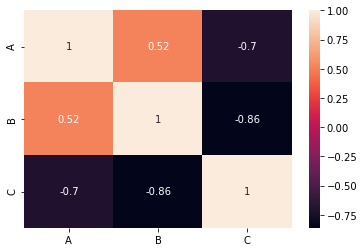

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

## Exercícios

Utilizando o arquivo 'dataset.csv' fornecido junto com este notebook, realize as tarefas abaixo.

1. Calcule a média, média aparada e a mediana de cada coluna;
2. Calcule o desvio absoluto médio, variância, desvio padrão e o MAD de cada coluna;
3. Calcule e exiba a matriz de correlação dos dados, em forma de mapa de calor; e
4. Discorra a respeito de suas descobertas, ou seja, quais conclusões podem ser tiradas a partir dos seus resultados?

Observação: você tem liberdade para utilizar as bibliotecas em Python que julgar necessárias.